In [1]:
import os
import numpy as np
import pandas as pd

from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [2]:
df=pd.read_csv("BUNDESBANK-BBK01_WT5511.csv",index_col=0)
df.head()

,Value
Date,
30-04-1968,39.10
31-05-1968,42.00
30-06-1968,40.95
31-07-1968,38.90
31-08-1968,39.85


In [6]:
idx=pd.to_datetime(df.index).to_period("M")
df.index=idx
df.head()

,Value
1968-04,39.10
1968-05,42.00
1968-06,40.95
1968-07,38.90
1968-08,39.85


In [7]:
df.shape

(577, 1)

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

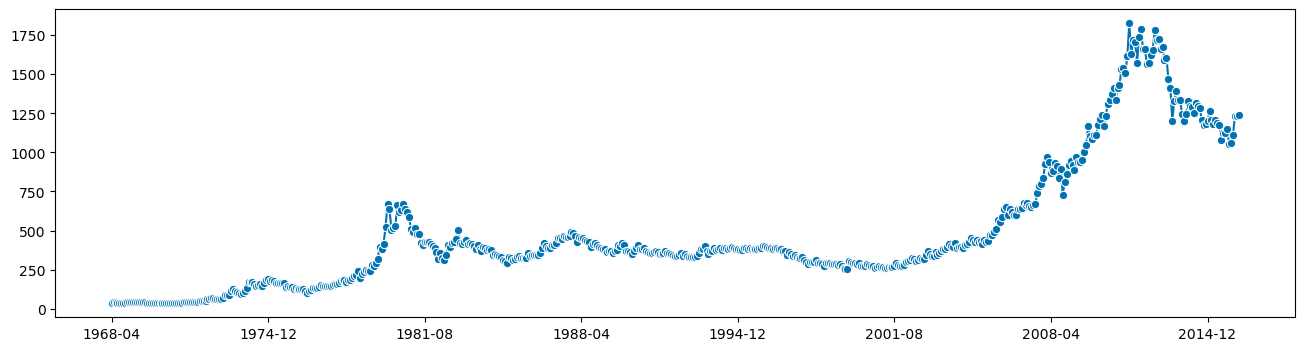

In [8]:
plot_series(df)

In [10]:
y=df['Value']
y_train,y_test=temporal_train_test_split(y,test_size=24)
print(y_train.shape,y_test.shape)

(553,) (24,)


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

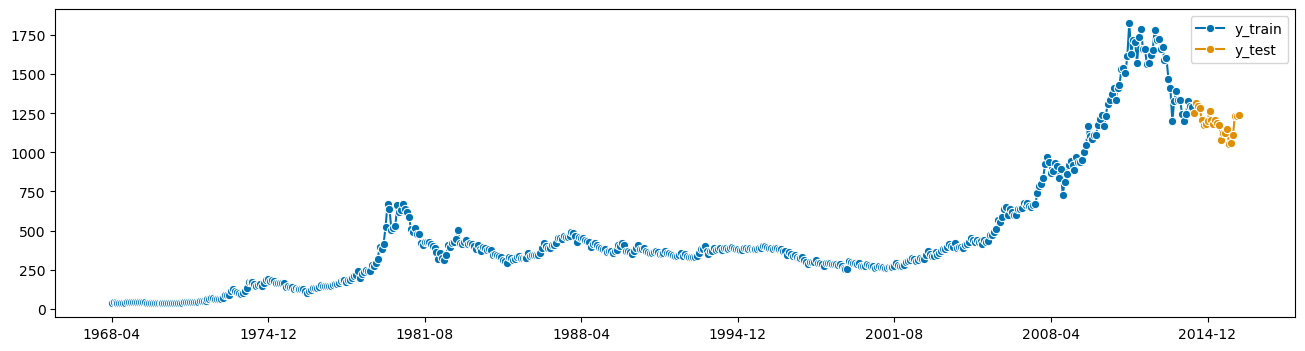

In [11]:
plot_series(y_train,y_test,labels=['y_train','y_test'])

In [12]:
# Specifying Forecasting Horizon

In [14]:
import matplotlib.pyplot as plt

In [15]:
fh=ForecastingHorizon(y_test.index,is_relative=False)
fh

ForecastingHorizon(['2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10',
             '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04',
             '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10',
             '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04'],
            dtype='period[M]', is_relative=False)

In [16]:
forecaster=AutoETS(auto=True,sp=1)
forecaster.fit(y_train)
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  553
Model:                       ETS(MAN)   Log Likelihood               -2398.539
Date:                Fri, 17 Nov 2023   AIC                           4807.078
Time:                        06:53:40   BIC                           4828.655
Sample:                    04-30-1968   HQIC                          4815.508
                         - 04-30-2014   Scale                            0.003
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.045     22.060      0.000       0.911       1.089
smoothing_trend     0.0500      0.020      2.465      0.014       0.010       0.090
initial_level      38.8048      

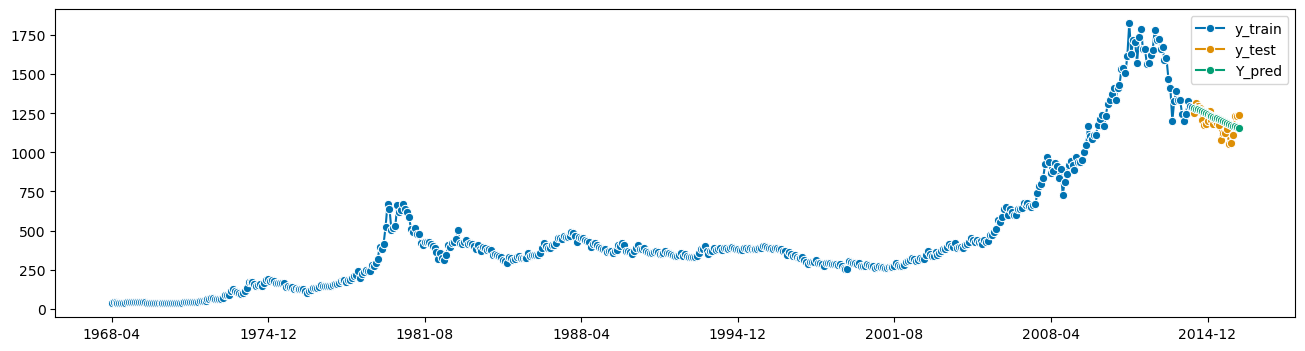

In [17]:
y_pred=forecaster.predict(fh)
plot_series(y_train,y_test,y_pred,labels=['y_train','y_test','Y_pred'])
plt.show()

In [18]:
mean_squared_error(y_test,y_pred,square_root=True)

65.83715013551323